<a href="https://colab.research.google.com/github/ryan9453/0602/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
# DataFrame: 表格. Series: 一行/一列.
df = pd.DataFrame(iris['data'],
          columns = iris['feature_names'])
df['ans'] = iris['target']
df.to_csv('iris.csv', encoding='utf-8', index = False)
df

In [22]:
# sklearn前: pandas.DataFrame
# sklearn後: np.array
import numpy as np
from sklearn.model_selection import train_test_split
x, y = np.array(df.drop(['ans'], axis=1)),np.array(df['ans'])
# 90% x, 10% x, 90% y, 10% y
x_train, x_test, y_train, y_test = train_test_split(x,
                    y,
                    test_size=0.1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(135, 4)
(15, 4)
(135,)
(15,)


In [24]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(279.0, 498.3, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 135\nvalue = [43, 47, 45]\nclass = versicolor'),
 Text(236.07692307692307, 407.70000000000005, 'gini = 0.0\nsamples = 43\nvalue = [43, 0, 0]\nclass = setosa'),
 Text(321.9230769230769, 407.70000000000005, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 92\nvalue = [0, 47, 45]\nclass = versicolor'),
 Text(171.69230769230768, 317.1, 'petal length (cm) <= 4.95\ngini = 0.177\nsamples = 51\nvalue = [0, 46, 5]\nclass = versicolor'),
 Text(85.84615384615384, 226.5, 'petal width (cm) <= 1.65\ngini = 0.043\nsamples = 45\nvalue = [0, 44, 1]\nclass = versicolor'),
 Text(42.92307692307692, 135.89999999999998, 'gini = 0.0\nsamples = 44\nvalue = [0, 44, 0]\nclass = versicolor'),
 Text(128.76923076923077, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(257.53846153846155, 226.5, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(214.615384

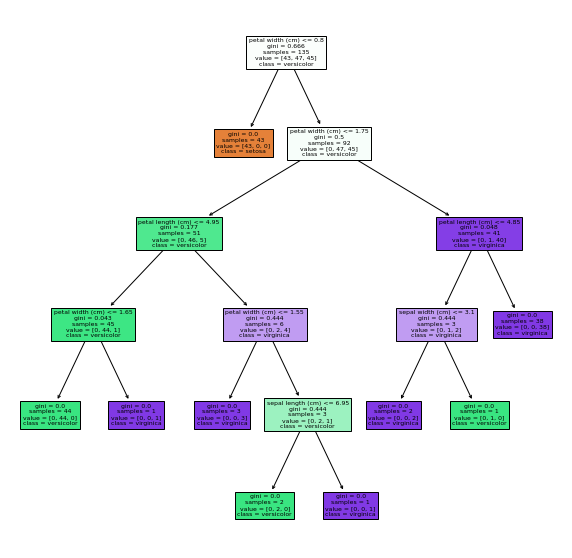

In [26]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (10, 10))
plot_tree(clf, 
    feature_names = iris['feature_names'],
    class_names = iris['target_names'],
    filled=True)